## Регрессия на imdb

In [19]:
# ячейка импортов
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


# место для импорта регрессионных моделей

In [2]:
! unzip "imdb.zip" 

Archive:  imdb.zip
  inflating: IMDB-Movie-Data.csv     


In [3]:
data = pd.read_csv('IMDB-Movie-Data.csv') # замените на актуальный путь

data.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


#### Определяю рейтинг фильма по доходу

In [16]:
# формирую датафрейм из дохода и соотв. рейтинга
dataset = pd.DataFrame(data['Revenue (Millions)'])
dataset = dataset.join(data['Rating'])
dataset

,Revenue (Millions),Rating
0,333.13,8.1
1,126.46,7.0
2,138.12,7.3
3,270.32,7.2
4,325.02,6.2
...,...,...
995,NaN,6.2
996,17.54,5.5
997,58.01,6.2
998,NaN,5.6


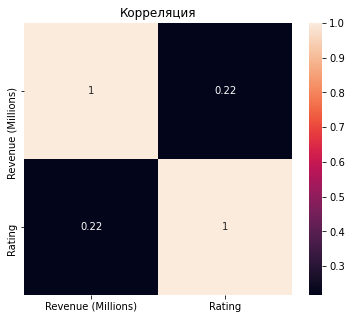

In [22]:
# интересно посмотреть, есть ли корреляция между доходом и рейтингом
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(data=dataset.corr(), annot=True, cmap= "rocket") 

plt.title("Корреляция")
plt.show()

#### Проверю, есть ли нулевые значения и уберу строки, где таковые имеются

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Revenue (Millions)  872 non-null    float64
 1   Rating              1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [31]:
dataset = dataset[dataset['Revenue (Millions)'].notna()]

In [34]:
print(len(dataset))
dataset

872


,Revenue (Millions),Rating
0,333.13,8.1
1,126.46,7.0
2,138.12,7.3
3,270.32,7.2
4,325.02,6.2
...,...,...
993,60.13,5.9
994,54.72,6.7
996,17.54,5.5
997,58.01,6.2


In [40]:
# строки удалились с индексами, обновлю индексы
dataset = dataset.set_index(np.arange(1, len(dataset)+1))
dataset

,Revenue (Millions),Rating
1,333.13,8.1
2,126.46,7.0
3,138.12,7.3
4,270.32,7.2
5,325.02,6.2
...,...,...
868,60.13,5.9
869,54.72,6.7
870,17.54,5.5
871,58.01,6.2


In [39]:
# теперь в датасете 872 строки
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Revenue (Millions)  872 non-null    float64
 1   Rating              872 non-null    float64
dtypes: float64(2)
memory usage: 20.4 KB


In [47]:
dataset2.values[1]

array([126.46])

In [49]:
dataset2 = dataset.drop('Rating', axis=1)
X = dataset2.values
X

array([[3.3313e+02],
       [1.2646e+02],
       [1.3812e+02],
       [2.7032e+02],
       [3.2502e+02],
       [4.5130e+01],
       [1.5106e+02],
       [8.0100e+00],
       [1.0001e+02],
       [2.3402e+02],
       [1.6927e+02],
       [5.3217e+02],
       [2.4875e+02],
       [2.8700e+00],
       [3.6831e+02],
       [6.7120e+01],
       [1.6216e+02],
       [5.1690e+01],
       [1.0050e+02],
       [7.2200e+00],
       [4.7700e+01],
       [1.5369e+02],
       [1.0314e+02],
       [6.5000e+00],
       [1.0000e-02],
       [1.1308e+02],
       [5.4650e+01],
       [6.0310e+01],
       [1.0640e+01],
       [1.5533e+02],
       [3.6302e+02],
       [2.6840e+01],
       [4.0808e+02],
       [1.8799e+02],
       [2.3260e+02],
       [9.3380e+01],
       [9.7660e+01],
       [2.7850e+01],
       [1.2790e+01],
       [4.2100e+00],
       [2.4106e+02],
       [3.4400e+00],
       [1.5880e+02],
       [9.3663e+02],
       [3.0350e+01],
       [3.2460e+01],
       [4.3000e+01],
       [5.333

In [51]:
y = dataset['Rating'].values # отдельно вынесли массив со значениями скорости ветра
y

array([8.1, 7. , 7.3, 7.2, 6.2, 6.1, 8.3, 7.1, 7. , 7.5, 7.8, 7.9, 7.7,
       6.4, 6.6, 8.2, 6.7, 8.1, 8. , 6.7, 7.9, 6.5, 5.3, 8.3, 4.7, 6.2,
       5.9, 6.3, 7.5, 7.1, 8. , 5.6, 7.9, 8.6, 7.6, 6.9, 6.3, 7.5, 7.2,
       6.3, 6.7, 7.3, 7.1, 8.1, 5.8, 5.6, 7.2, 9. , 7.3, 7.2, 7.4, 7. ,
       7.5, 6.7, 6.5, 4.1, 8.5, 7.7, 7.4, 8.1, 7.5, 7.2, 7.1, 7.5, 6.8,
       8.1, 7.1, 8.1, 8.3, 7.3, 5.3, 8.8, 7.9, 8.2, 8.1, 7.2, 7. , 6.4,
       7.8, 7.8, 7.4, 8.1, 7. , 8.1, 7.1, 7.4, 7.4, 8.6, 5.8, 6.3, 8.5,
       7. , 7. , 8. , 7.3, 7.7, 5.4, 6.3, 7.7, 6.3, 8.1, 7.7, 8.1, 5.8,
       6.2, 8.8, 7.2, 7.4, 6.7, 6.7, 6. , 8.5, 7.5, 5.7, 6.6, 6.4, 8. ,
       7.3, 6. , 6.4, 8.5, 7.1, 7.3, 8.1, 7.3, 8.1, 8. , 6.2, 7.8, 8.2,
       8.4, 8.1, 7.4, 7.6, 7.6, 6.2, 6.4, 7.2, 5.8, 7.6, 4.7, 7. , 7.4,
       7.5, 7.9, 7. , 8. , 6.1, 8. , 5.2, 6.5, 7.3, 7.3, 6.8, 7.9, 7.9,
       8. , 7.5, 6.5, 7.6, 7. , 7.4, 7.3, 6.7, 6.8, 7. , 8. , 6.3, 6.6,
       7.8, 6.3, 7.2, 8.1, 5.8, 8.2, 6.9, 8.1, 8.1, 6.3, 7.9, 6.

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [102]:
print(len(X_train), len(y_train), len(X_test),len(y_test))

654 654 218 218


In [119]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [128]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
print(mean_squared_error(y_test, preds))
r2_score(y_test, preds)

0.7265358046114713


-0.004490594313576901

In [131]:
regressor = Ridge(alpha=0.01) 
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
print(mean_squared_error(y_test, preds))
r2_score(y_test, preds)

0.7265348131444296


-0.004489223535548259

Нормализую

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(sc.fit_transform(X), y, random_state=42)

In [132]:
regressor = Ridge(alpha=0.01)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
print(mean_squared_error(y_test, preds))
print(r2_score(y_test, preds))

0.7265348131444296
-0.004489223535548259


In [133]:
regressor = SGDRegressor(alpha=0.01, verbose = 1, max_iter = 5000)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)

print(mean_absolute_error(y_test, preds))
print(r2_score(y_test, preds))

-- Epoch 1
Norm: 0.12, NNZs: 1, Bias: 5.592750, T: 654, Avg. loss: 5.495257
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.19, NNZs: 1, Bias: 6.442548, T: 1308, Avg. loss: 0.654111
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.21, NNZs: 1, Bias: 6.683005, T: 1962, Avg. loss: 0.403076
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.22, NNZs: 1, Bias: 6.760560, T: 2616, Avg. loss: 0.377767
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.22, NNZs: 1, Bias: 6.798835, T: 3270, Avg. loss: 0.374194
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.22, NNZs: 1, Bias: 6.803851, T: 3924, Avg. loss: 0.373642
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 1, Bias: 6.810069, T: 4578, Avg. loss: 0.373592
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.23, NNZs: 1, Bias: 6.811866, T: 5232, Avg. loss: 0.373467
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.22, NNZs: 1, Bias: 6.819335, T: 5886, Avg. loss: 0.373223
Total training time: 0.00 se

## Регрессии:

В этом датасете для регрессии есть несколько опций, выбирайте то, что более интересно: 

- определить рейтинг по описанию фильма
- определить длительность фильма по году создания
- определить рейтинг по длине фильма
- Ваша идея

Шаги выполнения: 
- Определите, какие части датасета необходимы для вашей задачи
- Если работаете с текстовыми ячейками, векторизуйте тексты
- Разделите данные на обучающую и тестовую выборку
- Попробуйте обучить [разные регрессионные модели](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) (не забудьте импортировать их в эту тетрадку)

- Для каждой модели посмотрите на метрики. 

Какая/какие модель/ли справляются с выбранной Вами задачей наиболее эффективно?